In [40]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# QALD9Plus-MT_de-babelscape_ner-mgenre_el-nllb_mt

In [2]:
df_kgqa = pd.read_csv("../data/Lingua Franca KGQA Experiments - mainTable.tsv", sep="\t")
df_neamt = pd.read_csv("../data/Lingua Franca NEAMT Evaluation (numerical placeholders) - MT Evaluation Results (All).tsv", sep="\t")

In [3]:
df_kgqa.head()

,Dataset,System,MicroF1,MacroF1,MicroPrecision,MacroPrecision,MicroRecall,MacroRecall,QALD-F1,Timestamp,ExperimentURI
0,qald_9_plus_train_dbpedia,NIFWS_Qanary_1(http://porque.cs.upb.de:40123/q...,0.015860,0.270551,0.016644,0.270489,0.015148,0.304283,0.454851,2022-09-27 11:58:31,http://gerbil-qa.aksw.org/gerbil/experiment?id...
1,qald_9_plus_train_dbpedia,NIFWS_Qanary_2(http://porque.cs.upb.de:40123/q...,0.000534,0.153233,0.001851,0.152801,0.000312,0.156863,0.270204,2022-09-27 11:58:35,http://gerbil-qa.aksw.org/gerbil/experiment?id...
2,qald_9_plus_train_dbpedia,NIFWS_Qanary_3(http://porque.cs.upb.de:40123/q...,0.015534,0.260033,0.015066,0.259709,0.016032,0.292298,0.440617,2022-09-27 13:58:45,http://gerbil-qa.aksw.org/gerbil/experiment?id...
3,qald_9_plus_train_dbpedia,NIFWS_Qanary_4(http://porque.cs.upb.de:40123/q...,0.018333,0.231852,0.028177,0.231040,0.013586,0.243279,0.388302,2022-09-27 14:50:57,http://gerbil-qa.aksw.org/gerbil/experiment?id...
4,qald_9_plus_test_dbpedia,NIFWS_Qanary_3(http://porque.cs.upb.de:40123/q...,0.004216,0.256712,0.004580,0.264491,0.003905,0.264943,0.409837,2022-09-27 16:04:06,http://gerbil-qa.aksw.org/gerbil/experiment?id...


In [4]:
df_neamt.head()

,Test Name,Source Language,Components,Gold File,Prediction File,Uploaded Gold File,Uploaded Prediction File,Experiment URI,System,Reference,BLEU,BLEU NLTK,METEOR,chrF++,TER,Error Count,Timestamp,GERBIL version
0,QALD10-MT,de,"['babelscape_ner', 'mag_el', 'libre_mt']",QALD10-MT_de-en_gold_file,pred_results/QALD10-MT_de-babelscape_ner-mag_e...,a1205346455a40bbbe969013a0b4947bQALD10-MT_de-e...,d53407c7ac67404d94f0ec91e9ae9033QALD10-MT_de-b...,https://beng.dice-research.org/gerbil/experime...,pred (uploaded),gold (uploaded),25.20,0.25,0.35,0.56,0.56,0,2022-09-19 19:23:06,1.2.7
1,QALD10-MT,de,"['babelscape_ner', 'mag_el', 'opus_mt']",QALD10-MT_de-en_gold_file,pred_results/QALD10-MT_de-babelscape_ner-mag_e...,a1205346455a40bbbe969013a0b4947bQALD10-MT_de-e...,835b61d61ea542f681ee893107e6a8faQALD10-MT_de-b...,https://beng.dice-research.org/gerbil/experime...,pred (uploaded),gold (uploaded),33.63,0.33,0.39,0.63,0.47,0,2022-09-19 19:23:17,1.2.7
2,QALD10-MT,de,"['babelscape_ner', 'mag_el', 'nllb_mt']",QALD10-MT_de-en_gold_file,pred_results/QALD10-MT_de-babelscape_ner-mag_e...,a1205346455a40bbbe969013a0b4947bQALD10-MT_de-e...,7c7c264f0257473b912ad4f9d0e8473bQALD10-MT_de-b...,https://beng.dice-research.org/gerbil/experime...,pred (uploaded),gold (uploaded),32.18,0.32,0.38,0.61,0.50,0,2022-09-19 19:23:27,1.2.7
3,QALD10-MT,de,"['babelscape_ner', 'mag_el', 'mbart_mt']",QALD10-MT_de-en_gold_file,pred_results/QALD10-MT_de-babelscape_ner-mag_e...,a1205346455a40bbbe969013a0b4947bQALD10-MT_de-e...,628682dd4b9b4f43b214acf3ff3a53f2QALD10-MT_de-b...,https://beng.dice-research.org/gerbil/experime...,pred (uploaded),gold (uploaded),33.14,0.33,0.38,0.62,0.49,0,2022-09-19 19:23:37,1.2.7
4,QALD10-MT,de,"['babelscape_ner', 'mgenre_el', 'libre_mt']",QALD10-MT_de-en_gold_file,pred_results/QALD10-MT_de-babelscape_ner-mgenr...,a1205346455a40bbbe969013a0b4947bQALD10-MT_de-e...,e33b42660d4c4b6c8c96f4e160fbbfcbQALD10-MT_de-b...,https://beng.dice-research.org/gerbil/experime...,pred (uploaded),gold (uploaded),25.89,0.26,0.35,0.57,0.54,0,2022-09-19 19:23:47,1.2.7


In [5]:
join_column = []

for i, row in df_neamt.iterrows():
    pipeline = '-'.join(c for c in ast.literal_eval(row["Components"]))
    join_column.append(f"{row['Test Name']}_{row['Source Language']}-{pipeline}")

df_neamt["join_column"] = join_column

In [6]:
# inner join of two dataframes
joined = pd.merge(df_neamt, df_kgqa.rename(columns={'Dataset':'join_column'}), on='join_column',  how='inner')

In [7]:
joined = joined[['Test Name', 'Source Language', 'Components', 'BLEU', 'BLEU NLTK', 'METEOR', 'chrF++', 'TER', 'System_y', 'MicroF1', 'MacroF1', 'MicroPrecision', 'MacroPrecision', 'MicroRecall', 'MacroRecall', 'QALD-F1']]
joined.dropna(inplace=True)

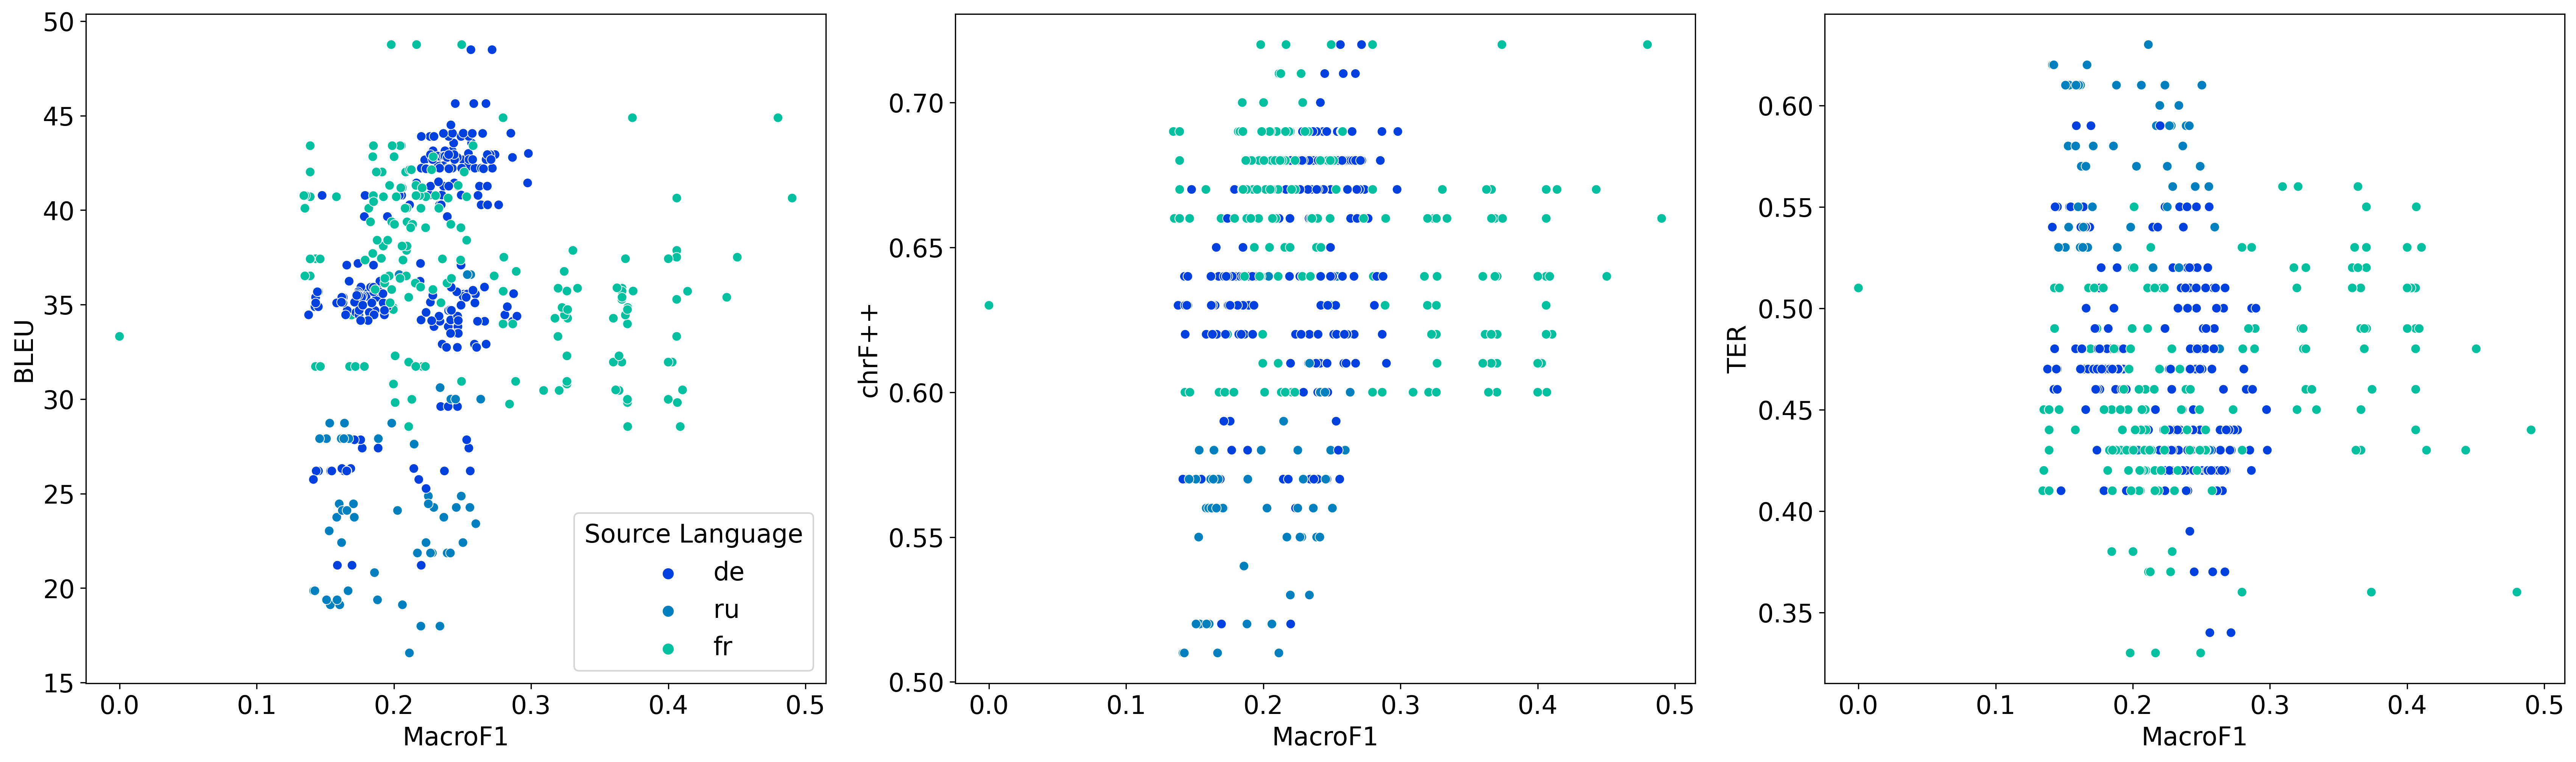

In [12]:
plt.rcParams['font.size'] = 16

metrics = ['BLEU', 'chrF++', 'TER']
fig, axs = plt.subplots(ncols=len(metrics), figsize=(23, 7), dpi=300)

for i, metric in enumerate(metrics):
    sns.scatterplot(data=joined, x="MacroF1", y=metric, hue="Source Language", ax=axs[i], palette='winter')
    # axs[i].set_xticklabels(['NEAMT', 'Standard MT'])
    # axs[i].set_xlabel("")
    if i != 0:
        axs[i].legend().remove()

plt.tight_layout()
# plt.savefig('../data/img/strip-plot-all.pdf')

In [14]:
corr = joined[['BLEU', 'chrF++', 'TER', 'MicroF1', 'MacroF1', 'MicroPrecision', 'MacroPrecision', 'MicroRecall', 'MacroRecall', 'QALD-F1']].corr()

In [15]:
corr

,BLEU,chrF++,TER,MicroF1,MacroF1,MicroPrecision,MacroPrecision,MicroRecall,MacroRecall,QALD-F1
BLEU,1.000000,0.958364,-0.943882,0.059023,0.125063,0.066822,0.117574,0.013702,0.072439,0.100014
chrF++,0.958364,1.000000,-0.964078,0.056372,0.150545,0.077317,0.141699,0.044037,0.104258,0.120738
TER,-0.943882,-0.964078,1.000000,-0.033372,-0.068278,-0.073260,-0.060002,0.011618,-0.031267,-0.055010
MicroF1,0.059023,0.056372,-0.033372,1.000000,0.188356,0.428117,0.166220,0.857721,0.249762,-0.125521
MacroF1,0.125063,0.150545,-0.068278,0.188356,1.000000,0.246328,0.994679,0.302245,0.962062,0.893908
MicroPrecision,0.066822,0.077317,-0.073260,0.428117,0.246328,1.000000,0.219121,0.297591,0.216190,0.072816
MacroPrecision,0.117574,0.141699,-0.060002,0.166220,0.994679,0.219121,1.000000,0.281742,0.954061,0.894277
MicroRecall,0.013702,0.044037,0.011618,0.857721,0.302245,0.297591,0.281742,1.000000,0.369079,0.003194
MacroRecall,0.072439,0.104258,-0.031267,0.249762,0.962062,0.216190,0.954061,0.369079,1.000000,0.889340
QALD-F1,0.100014,0.120738,-0.055010,-0.125521,0.893908,0.072816,0.894277,0.003194,0.889340,1.000000


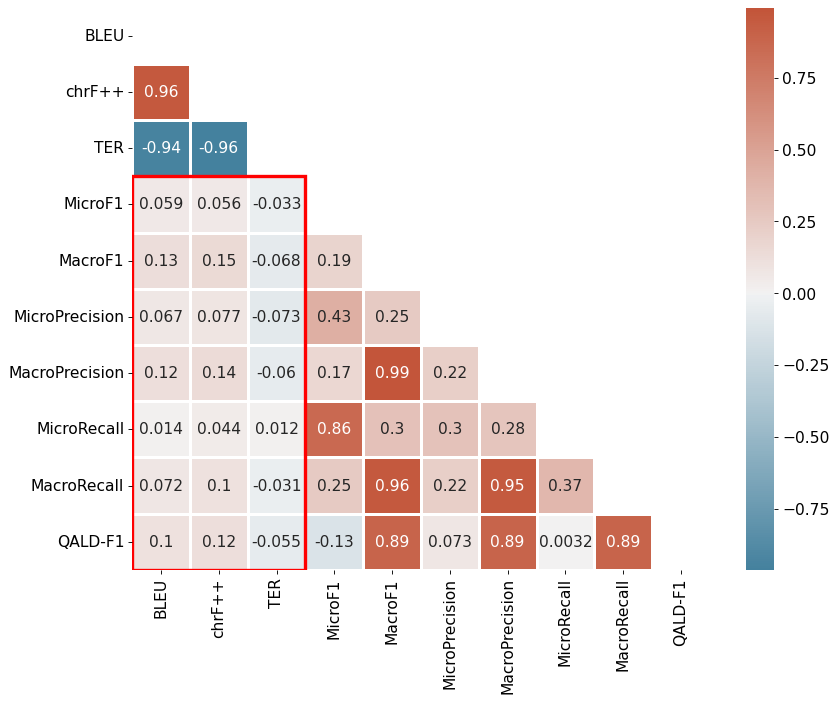

In [81]:
plt.rcParams['font.size'] = 14
f, ax = plt.subplots(figsize=(11, 9), dpi=80)

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, cmap=cmap, mask=mask, center=0, linewidths=2.5, fmt='.2g', ax=ax)

rect = patches.Rectangle((0, 3), 3, 7, linewidth=3, edgecolor='r', facecolor='none',)
ax.add_patch(rect)

plt.tight_layout()
plt.savefig('../data/img/mt-kgqa-heatmap.pdf')